https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [37]:
import pandas as pd
import numpy as np

# 1 – Boolean Indexing in Pandas

What do you do, if you want to filter values of a column based on conditions from another set of columns from a Pandas Dataframe? For instance, we want a list of all females who are not graduates and got a loan. Boolean indexing can help here. You can use the following code:

In [10]:
data = pd.read_csv('/Users/yutian.lei/Desktop/Data-Manipulation-yt/train_data.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


# 2 – Apply Function in Pandas
It is one of the commonly used Pandas functions for manipulating a pandas dataframe and creating new variables. Pandas Apply function returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [15]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(data.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row
# Note: Pandas head() function is used in second output because it contains many rows.

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
0    1
1    0
2    0
3    0
4    0
dtype: int64


# 3 – Imputing missing values using Pandas
‘fillna()’ does it in one go. It is used for updating missing values with the overall mean/mode/median of the column. Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [16]:
#First we import scipy function to determine the mode
from scipy.stats import mode
mode(data['Gender'])

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

This returns both mode and count. Remember that mode can be an array as there can be multiple values with high frequency. We will take the first one by default always using:

In [17]:
mode(data['Gender']).mode[0]


'Male'

Now we can fill the missing values in the Pandas Dataframe data and check using technique #2.

In [19]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Hence, it is confirmed that missing values in Pandas dataframe are imputed. Please note that this is the most primitive form of imputation. Other sophisticated techniques include modeling the missing values, using grouped averages (mean/mode/median).

# 4 – Pivot Table in Pandas
Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “LoanAmount” which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. The mean ‘LoanAmount’ of each group in Pandas dataframe can be determined as:

In [21]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


# 5 – Multi-Indexing in Pandas Dataframe
If you notice the output of step #3, it has a strange property. Each Pandas index is made up of a combination of 3 values. This is called Multi-Indexing. It helps in performing operations really fast.

Continuing the example from #3, we have the values for each group but they have not been imputed.
This can be done using the various techniques from pandas learned till now.

In [23]:
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Note:

- Multi-index requires tuple for defining groups of indices in pandas loc statement. This is a tuple used in function.
- The .values[0] suffix is required because, by default a series element is returned which has an index not matching with that of the pandas dataframe. In this case, a direct assignment gives an error.

# 6. Pandas Crosstab
This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below:

In [26]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


These are absolute numbers. But, percentages can be more intuitive in making some quick insights. We can do this using the Pandas apply function:

In [28]:
def percConvert(ser):
  return ser/float(ser[-1])

pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


Now, it is evident that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 9% without credit history.

But that’s not it. It tells an interesting story. Since I know that having a credit history is super important, what if I predict loan status to be Y for ones with credit history and N otherwise. Surprisingly, we’ll be right 82+378=460 times out of 614 which is a whopping 75%!

# 7 – Merge Pandas DataFrames
Merging Pandas dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. Let’s define a Pandas dataframe as:

In [31]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


Now we can merge this information with the original Pandas dataframe as:



In [32]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179
Semiurban,5000,233
Urban,12000,202


The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.

# 8 – Sorting Pandas DataFrames
Pandas allow easy sorting based on multiple columns. This can be done as:

In [33]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


Note: Pandas “sort” function is now deprecated. We should use “sort_values” instead.

# 9 – Plotting (Boxplot & Histogram) with Pandas
Many of you might be unaware that boxplots and histograms can be directly plotted in Pandas and calling matplotlib separately is not necessary. It’s just a 1-line command. For instance, if we want to compare the distribution of ApplicantIncome by Loan_Status:

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


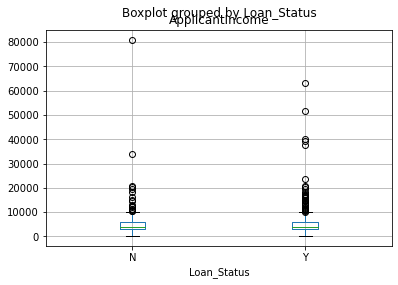

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bbd848340>,
      dtype=object)

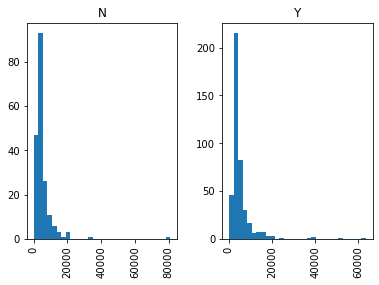

In [35]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

# 10 – Cut function for binning
Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.

Here we define a simple function which can be re-used for binning any variable fairly easily.

In [39]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print(pd.value_counts(data["LoanAmount_Bin"], sort=False))

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64


# 11 – Coding nominal data using Pandas
Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

1. Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
2. Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
3. Some categories might have very low frequencies and its generally a good idea to combine them.   
Here I’ve defined a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.

In [41]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print('Before Coding:')
print(pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print('\nAfter Coding:')
print(pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


# 12 – Iterating over rows of a Pandas Dataframe
This is not a frequently used Pandas operation. Still, you don’t want to get stuck. Right? At times you may need to iterate through all rows of a Pandas dataframe using a for loop. For instance, one common problem we face is the incorrect treatment of variables in Python. This generally happens when:

Nominal variables with numeric categories are treated as numerical.     
Numeric variables with characters entered in one of the rows (due to a data error) are considered categorical.      
So it’s generally a good idea to manually define the column types. If we check the data types of all columns:

In [45]:
#Check current type:
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

In [46]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

Here we see that Credit_History is a nominal variable but appearing as float. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types. For instance, here I have created a csv file datatypes.csv.